# Attrition Risk Analyzer (v2.0)
 
## Objective
Analyze IBM HR Attrition dataset to identify attrition patterns and create a simple attrition risk flag.

In [3]:
# Import required libraries
import pandas as pd

## Step 1: Load the Dataset
 
Dataset: IBM HR Analytics Attrition Dataset (Kaggle)  
File: `WA_Fn-UseC_-HR-Employee-Attrition.csv`

In [4]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
 
# Basic info
print("Shape of data:", df.shape)
df.head()

Shape of data: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 2: Attrition Overview
 
Check how many employees have left (Attrition = Yes) vs stayed (Attrition = No).

In [5]:
# Attrition counts
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Step 3: Attrition by Job Role
 
See how attrition is distributed across different job roles.

In [6]:
# Group attrition by job role
job_attrition = df.groupby(['JobRole', 'Attrition']).size().unstack().fillna(0)
job_attrition

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


## Step 4: Create Attrition Risk Flag
 
We will add a new column: 1 if Attrition = Yes, else 0.

In [7]:
# Add Attrition Risk flag
df['AttritionRisk'] = df['Attrition'].apply(lambda x: 1 if x=="Yes" else 0)
 
# Preview
df[['JobRole', 'Attrition', 'AttritionRisk']].head()

,JobRole,Attrition,AttritionRisk
0,Sales Executive,Yes,1
1,Research Scientist,No,0
2,Laboratory Technician,Yes,1
3,Research Scientist,No,0
4,Laboratory Technician,No,0


## Step 5: Save Processed Dataset
 
This file will be useful for visualizations and further analysis.

In [8]:
# Save processed dataset
df.to_csv("processed_hr_data.csv", index=False)
print("Processed dataset saved as processed_hr_data.csv ✅")

Processed dataset saved as processed_hr_data.csv ✅


# Part 2: Visualizations
Now let’s explore attrition patterns with charts.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Chart-1 ➡️Overall Attrition Count

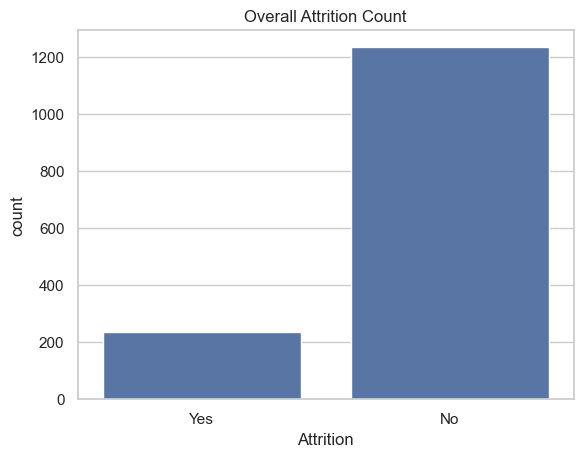

In [11]:
sns.countplot(data=df,x="Attrition")
plt.title("Overall Attrition Count")
plt.show()

## Chart-2 ➡️ Attrition by Department

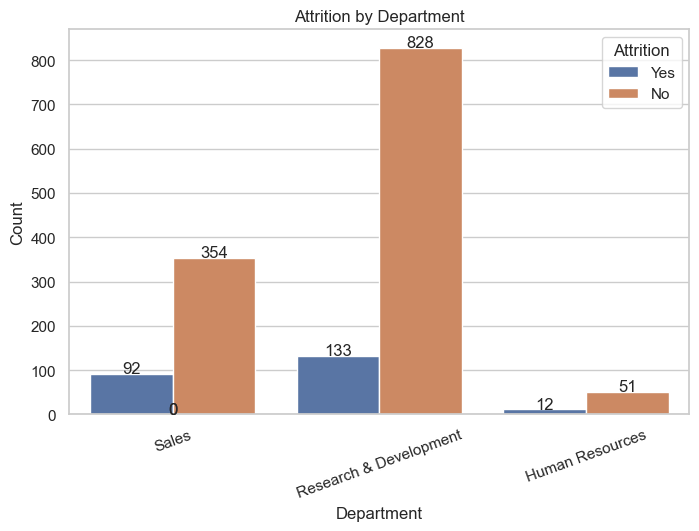

In [20]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x="Department",hue="Attrition",)
plt.title("Attrition by Department")
plt.xticks(rotation=20)
ax.set_ylabel("Count")
#Add data labels
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+1,
            int(height),
            ha="center")
plt.show()

## Chart-3 ➡️ Attrition by Age

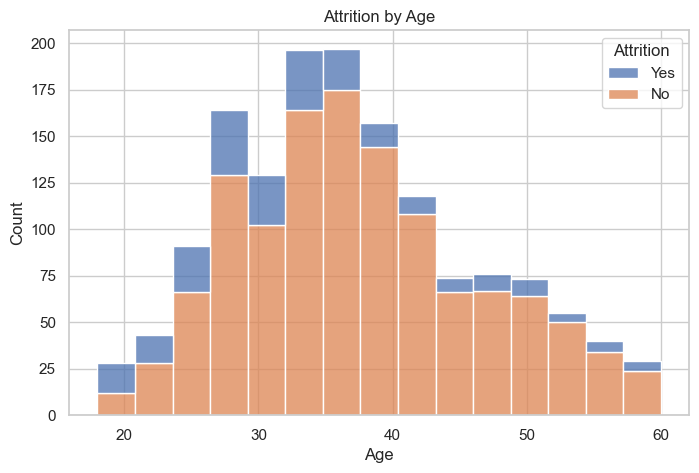

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=15)
plt.title("Attrition by Age")
plt.show()

## Chart-4 ➡️ Attrition % by Job Role

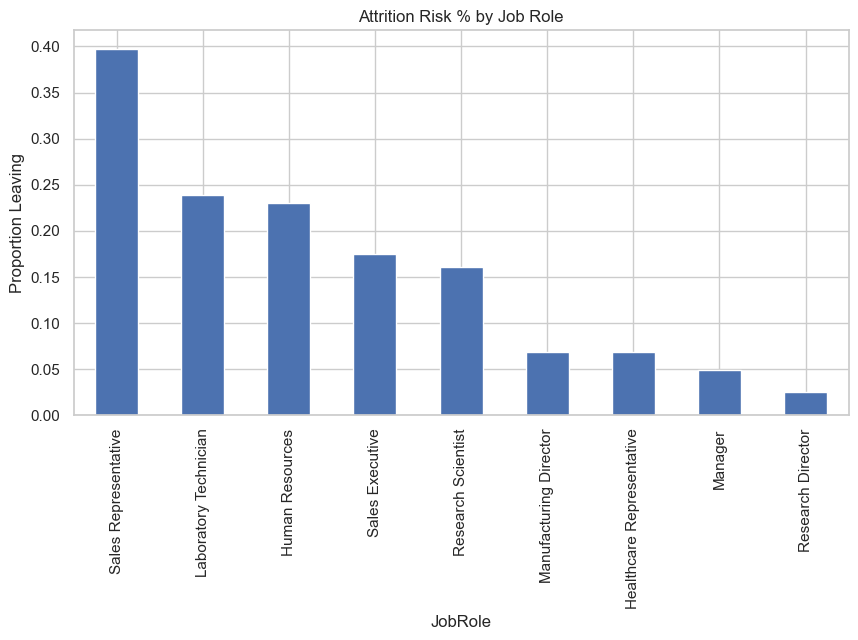

In [22]:
job_attrition_pct = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
 
plt.figure(figsize=(10,5))
job_attrition_pct['Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title("Attrition Risk % by Job Role")
plt.ylabel("Proportion Leaving")
plt.show()